---
<div style="text-align: center;">
    <h1>1 - Import Libraries</h1>
</div>

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

---
<div style="text-align: center;">
    <h1>2 - Read and Explain Dataset</h1>
</div>

---

In [6]:
data_final = pd.read_csv("./Data/test.csv")

data_original = pd.read_csv("./Data/train.csv")
data = pd.read_csv("./Data/train.csv")

data.sample(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
164,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,152000
286,287,50,RL,77.0,9786,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,159000
830,831,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
989,990,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,197000
742,743,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,12,2007,WD,Normal,179000
455,456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500



| Variable        | Definition                                | Key                                                                 |
|-----------------|--------------------------------------------|----------------------------------------------------------------------|
| Id              | Identifier                                 | Unique ID for each house                                            |
| MSSubClass      | Building class                             | Identifies the type of dwelling involved in the sale                |
| MSZoning        | Zoning classification                      | RL = Residential Low Density, RM = Residential Medium Density       |
| LotFrontage     | Linear feet of street connected to property|                                                                      |
| LotArea         | Lot size in square feet                    |                                                                      |
| Street          | Type of road access                        | Gravel, Paved                                                       |
| Alley           | Type of alley access                       | Gravel, Paved, NA = no alley access                                 |
| LotShape        | General shape of property                  | Reg = Regular, IR1/2/3 = Irregular                                  |
| LandContour     | Flatness of the property                   | Flat, HLS = Hillside, Low = Low, Bnk = Bank                         |
| Utilities       | Type of utilities available                | AllPub = All public utilities                                       |
| Neighborhood    | Physical locations within Ames city        | E.g., CollgCr, Veenker, Crawfor                                     |
| OverallQual     | Overall material and finish quality        | 1 = Very Poor, 10 = Excellent                                       |
| OverallCond     | Overall condition                          | 1 = Very Poor, 10 = Excellent                                       |
| YearBuilt       | Original construction year                 |                                                                      |
| YearRemodAdd    | Remodel year                               | Year of remodeling (or same as YearBuilt if no remodel)            |
| RoofStyle       | Type of roof                               | Gable, Hip, Flat, Shed, etc.                                        |
| Exterior1st     | Exterior covering on house (1st)           | VinylSd, MetalSd, etc.                                              |
| MasVnrType      | Masonry veneer type                        | BrkFace, Stone, None, etc.                                          |
| MasVnrArea      | Masonry veneer area (in square feet)       |                                                                      |
| ExterQual       | Exterior material quality                  | Ex = Excellent, Gd = Good, TA = Typical, Fa = Fair, Po = Poor       |
| BsmtQual        | Basement height                            | Ex, Gd, TA, Fa, NA = No basement                                    |
| TotalBsmtSF     | Total square feet of basement area         |                                                                      |
| 1stFlrSF        | First floor square feet                    |                                                                      |
| 2ndFlrSF        | Second floor square feet                   |                                                                      |
| GrLivArea       | Above grade (ground) living area           |                                                                      |
| FullBath        | Full bathrooms above grade                 |                                                                      |
| HalfBath        | Half bathrooms above grade                 |                                                                      |
| BedroomAbvGr    | Bedrooms above grade                       |                                                                      |
| KitchenAbvGr    | Kitchens above grade                       |                                                                      |
| KitchenQual     | Kitchen quality                            | Ex, Gd, TA, Fa, Po                                                  |
| TotRmsAbvGrd    | Total rooms above grade (not including bathrooms) |                                                               |
| GarageType      | Garage location                            | Attached, Detached, BuiltIn, etc.                                   |
| GarageArea      | Size of garage in square feet              |                                                                      |
| GarageQual      | Garage quality                             | Ex, Gd, TA, Fa, Po, NA                                              |
| YrSold          | Year sold                                  |                                                                      |
| MoSold          | Month sold                                 |                                                                      |
| SaleType        | Type of sale                               | WD = Warranty Deed, New = Newly Built, etc.                         |
| SaleCondition   | Condition of sale                          | Normal, Abnorml, Partial, etc.                                      |
| SalePrice       | Final house sale price                     | **TARGET**                                                          |

---

### 📝 Variable Notes

- **MSSubClass**: Identifica o tipo de residência (ex: 20 = 1-STORY 1946 & NEWER ALL STYLES, 60 = 2-STORY 1946 & NEWER).
- **OverallQual** e **OverallCond**: Avaliações qualitativas do imóvel — quanto maior, melhor.
- **GrLivArea**: É uma das variáveis mais correlacionadas com o preço final da casa.
- **SalePrice**: Essa é a variável alvo (target) da predição.


---
<div style="text-align: center;">
    <h1>3 - Exploratory Data Analysis</h1>
</div>

---

In [7]:
data.shape

(1460, 81)

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

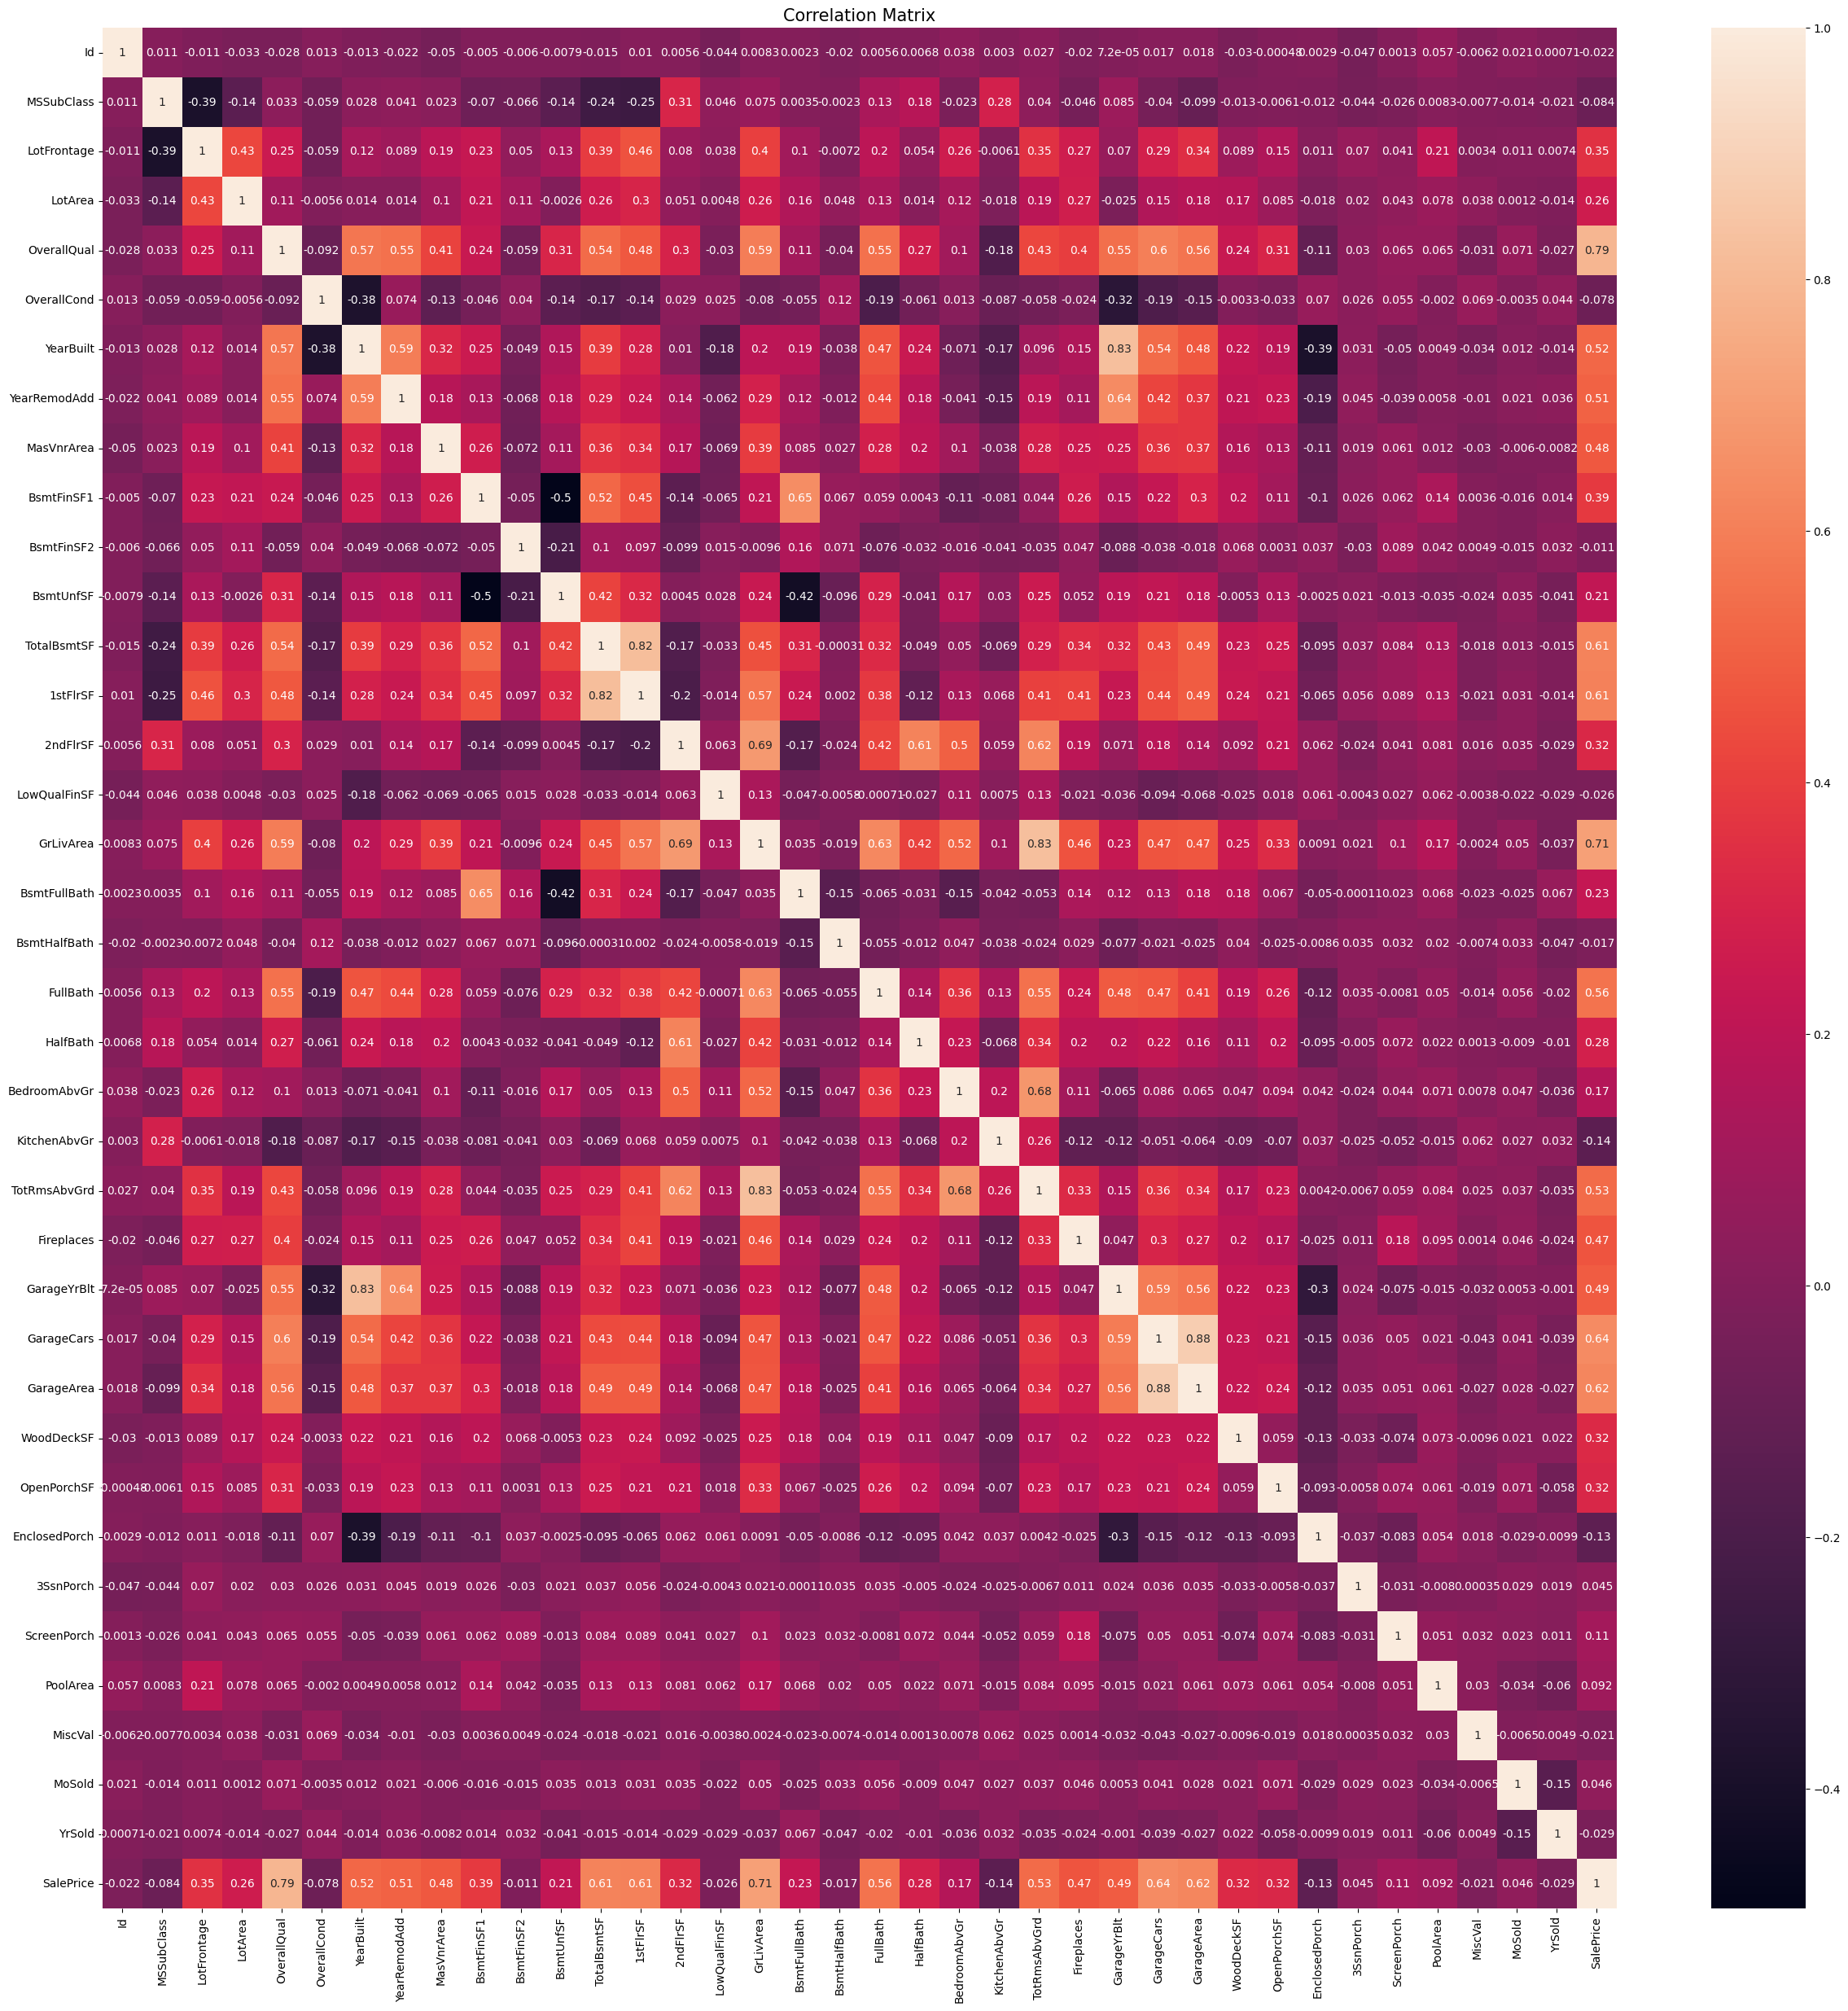

In [21]:
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(data.select_dtypes(exclude=['object']).corr(),annot=True, ax=ax)
plt.title('Correlation Matrix', fontsize=15)
plt.show()


<div style="text-align: center;">
    <h1> Univariate Analysis</h1>
</div>


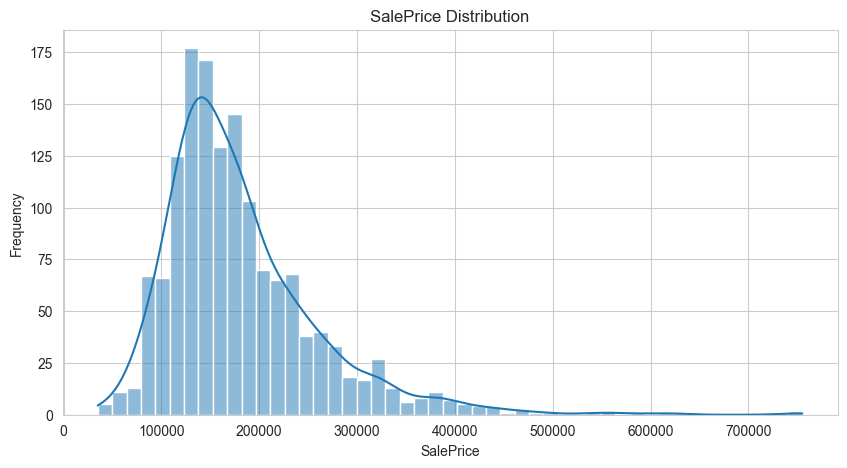

Shewness:  1.8828757597682129
Kurtosis:  6.536281860064529


In [32]:
plt.figure(figsize=(10,5))
sns.histplot(data['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

print("Shewness: ", data['SalePrice'].skew())
print("Kurtosis: ", data['SalePrice'].kurt())

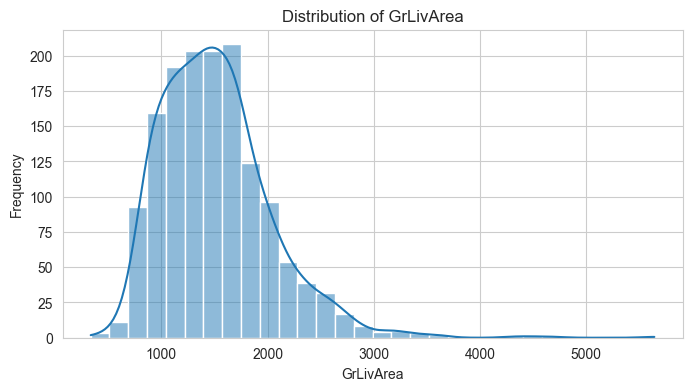

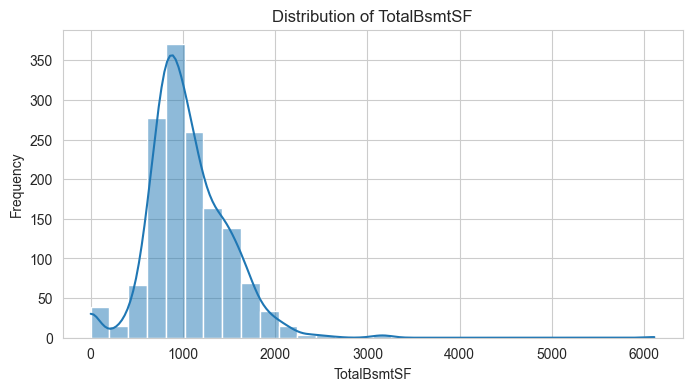

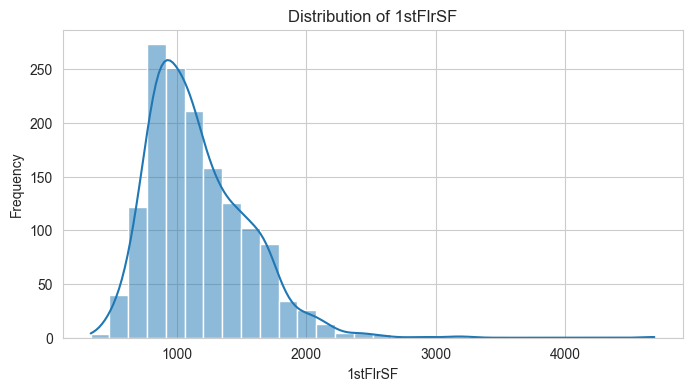

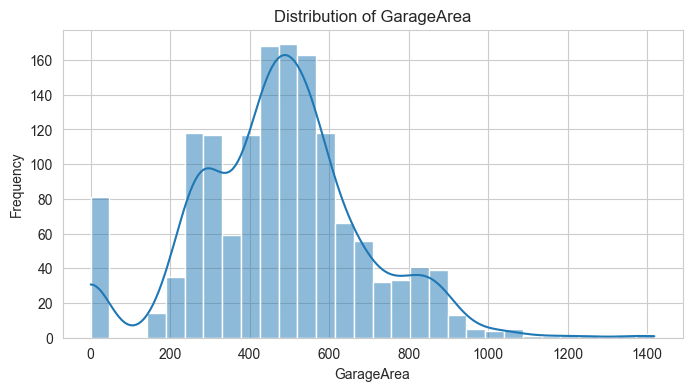

In [34]:
numerical_cols = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

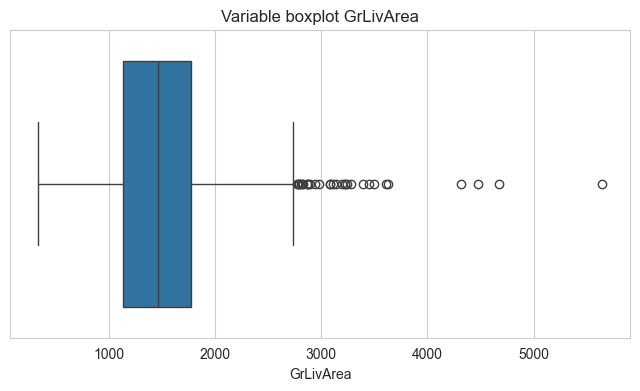

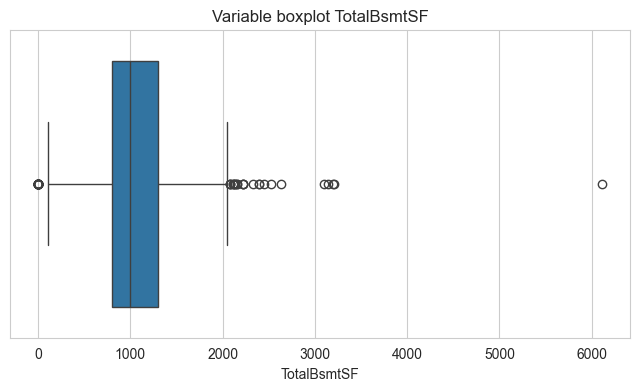

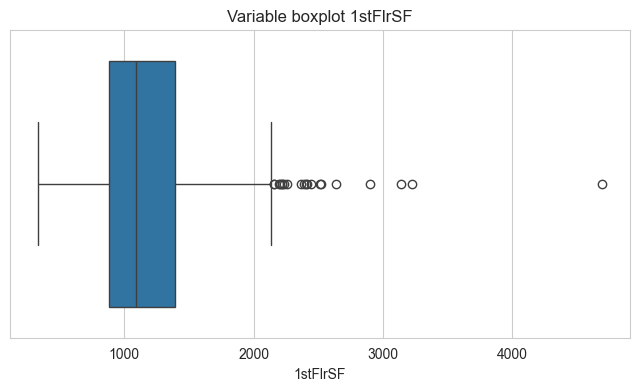

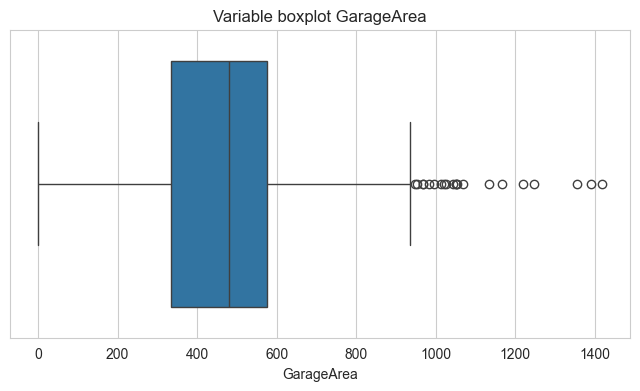

In [35]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col)
    plt.title(f'Variable boxplot {col}')
    plt.xlabel(col)
    plt.show()

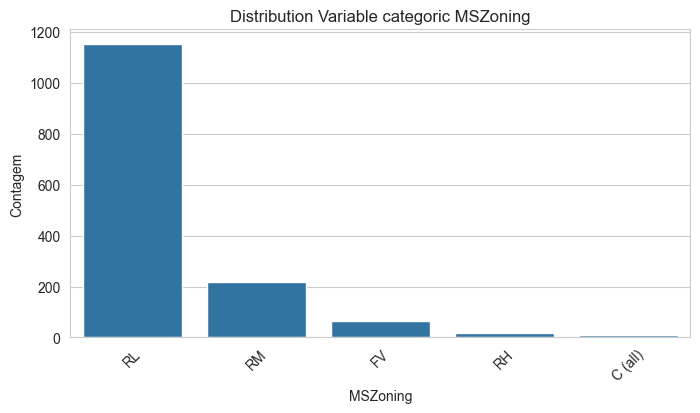

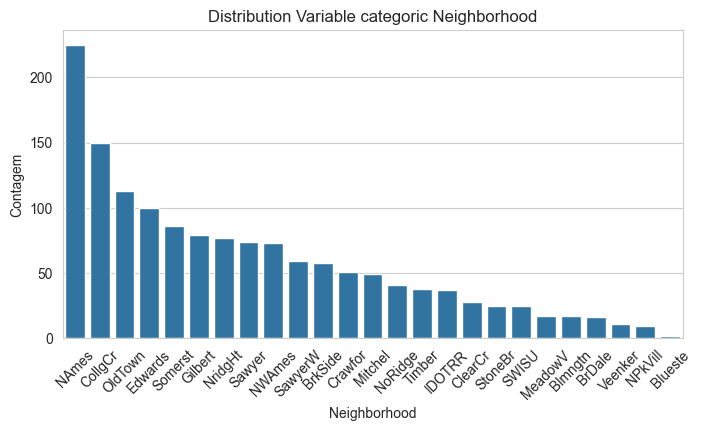

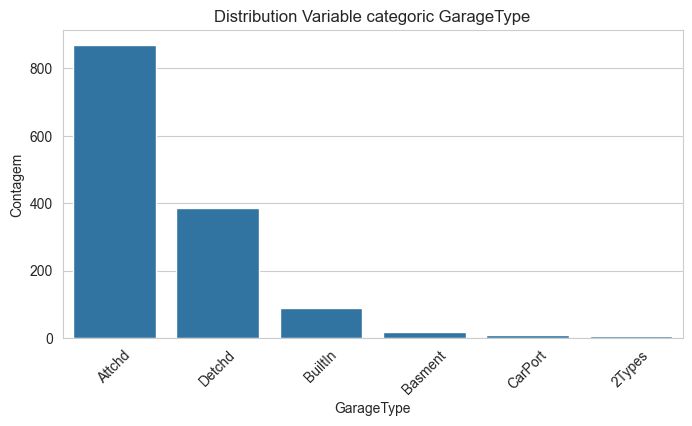

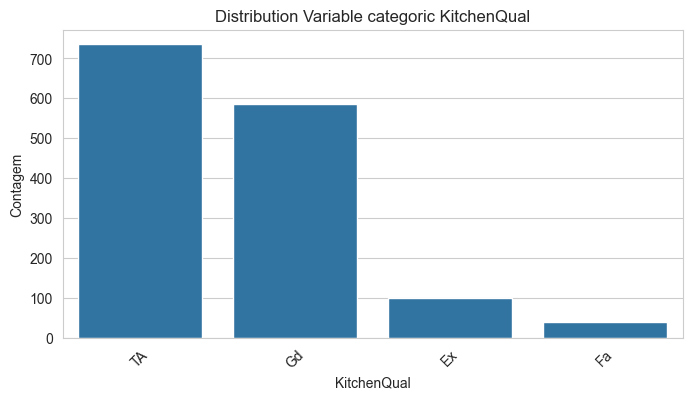

In [38]:
categoric_feat = ['MSZoning', 'Neighborhood', 'GarageType', 'KitchenQual']

for col in categoric_feat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribution Variable categoric {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

---
<div style="text-align: center;">
    <h1>4 - Dealing w/ Outliers</h1>
</div>

---

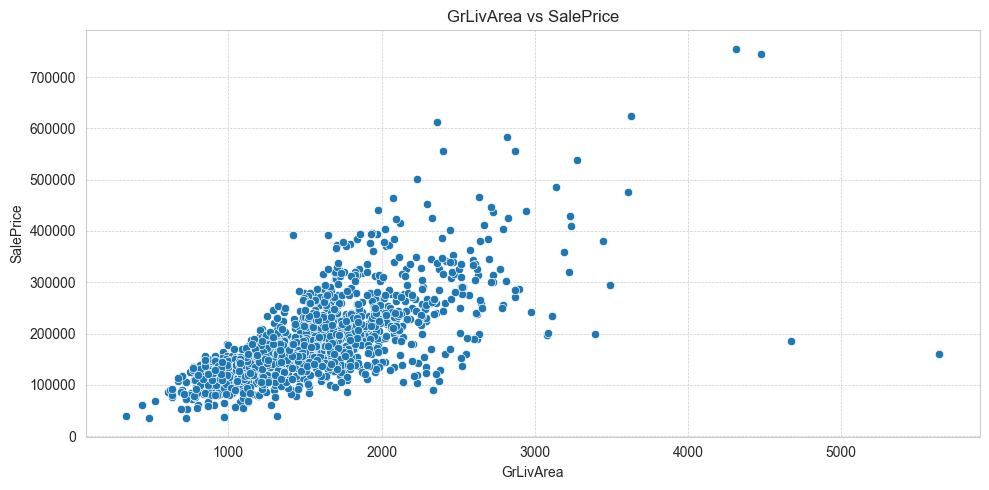

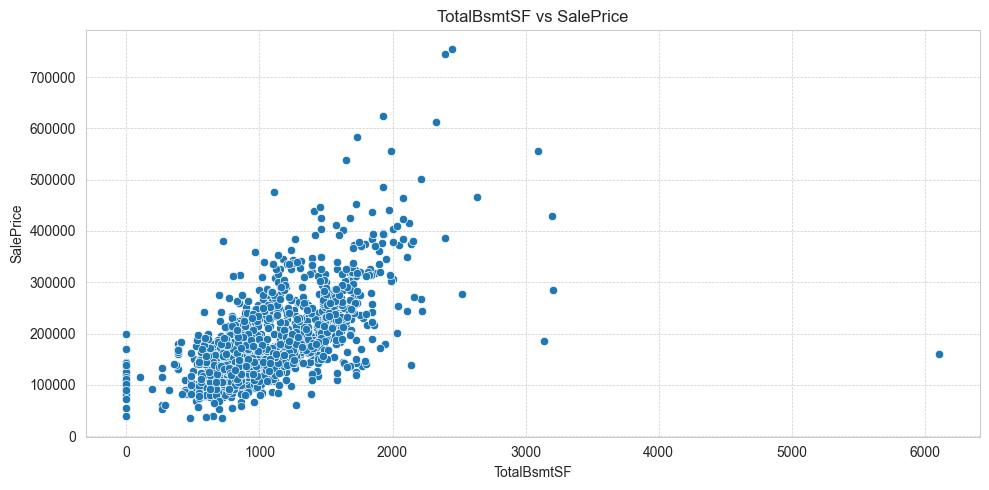

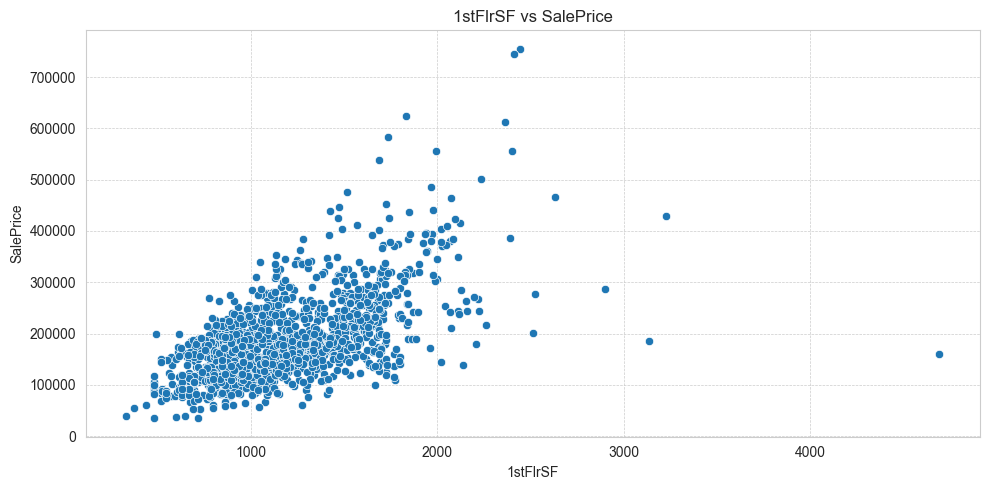

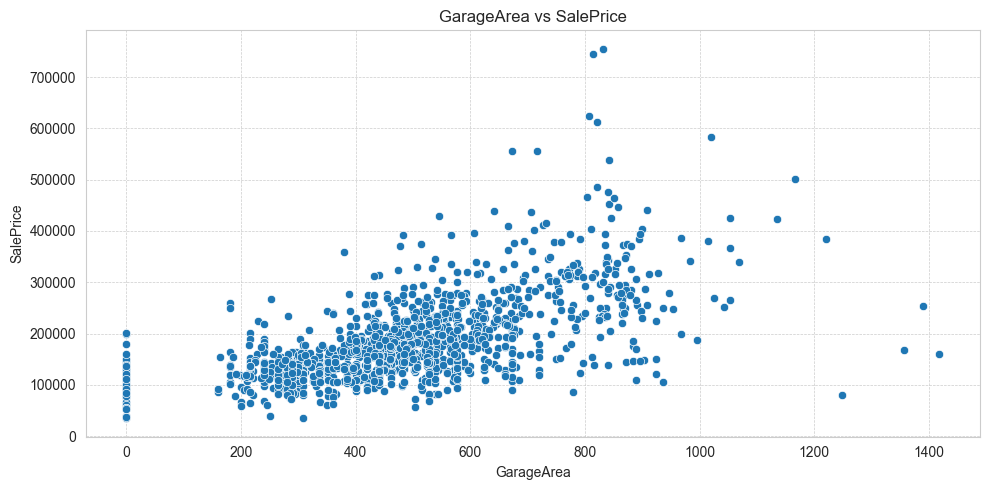

In [39]:
outlier_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

for feature in outlier_features:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=data, x=feature, y= 'SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [45]:
outliers = data[(data['GrLivArea'] >2600) & (data['SalePrice'] < 400000)]
print("Extreme outliers:")
print(outliers[['Id', 'GrLivArea', 'SalePrice']])

data = data.drop(outliers.index)
print(f"Shape after outlier removal: {data.shape}")

Extreme outliers:
Empty DataFrame
Columns: [Id, GrLivArea, SalePrice]
Index: []
Shape after outlier removal: (1407, 81)


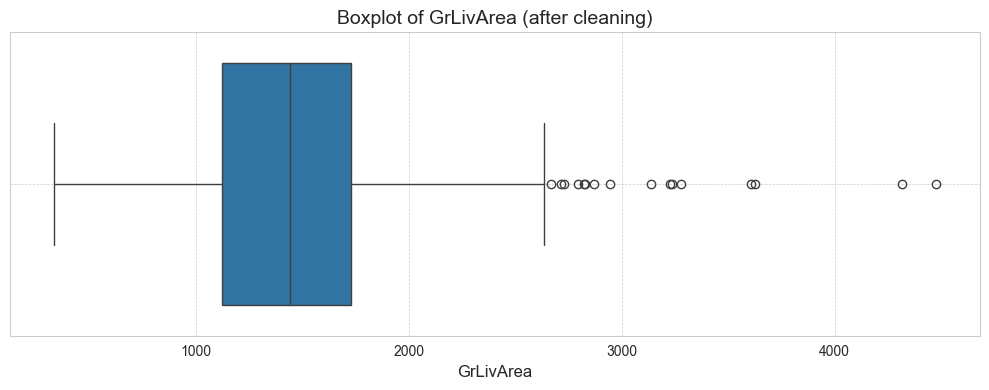

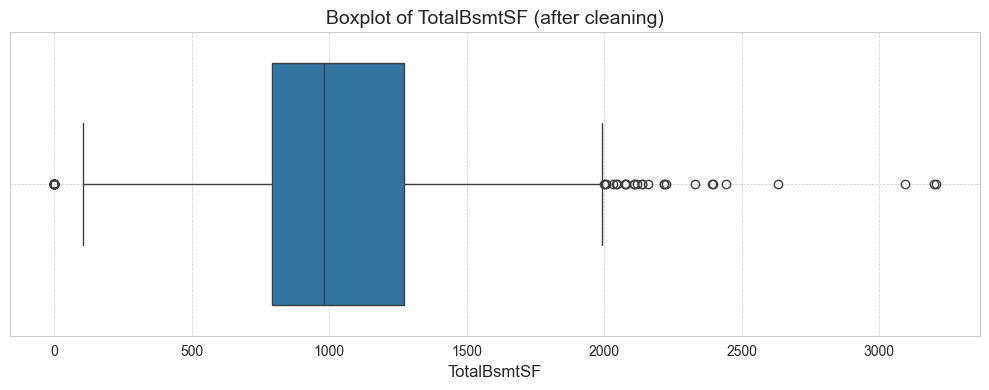

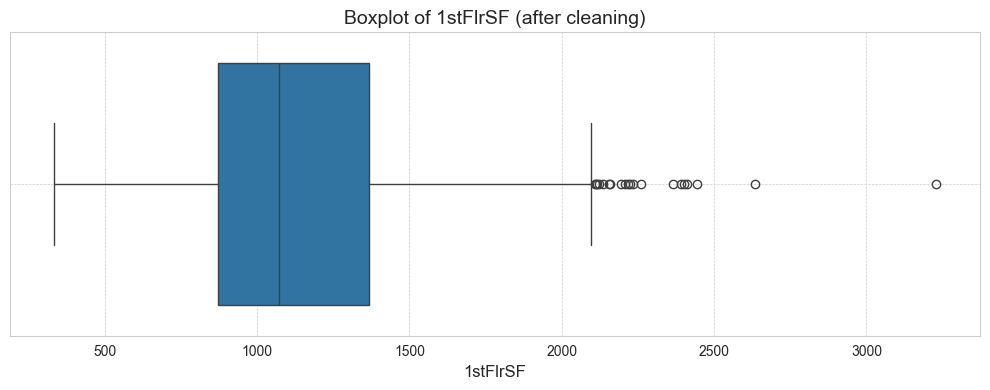

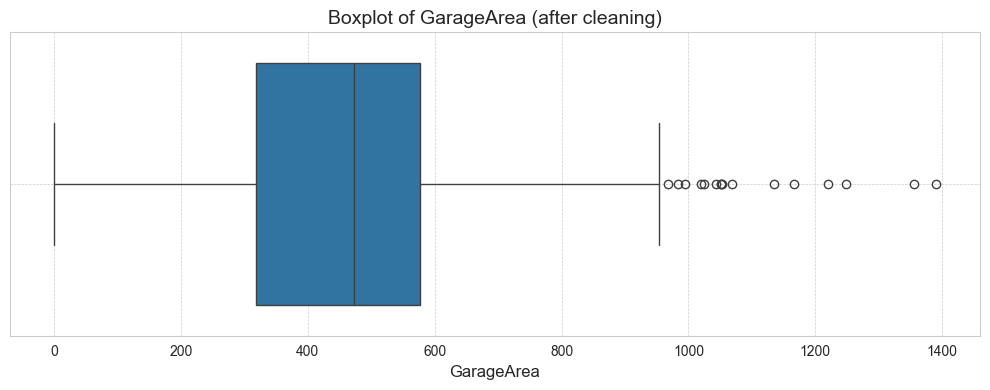

In [44]:
for feature in outlier_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature} (after cleaning)', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()